##### In order to run the bellow cells, download Amazon datasets for electronics from https://amazon-reviews-2023.github.io/main.html and place them in the ```/data``` folder.

In [1]:
import json
import pandas as pd

## Filter Items that have been observed for the first time in year 2022 or later.

In [2]:
def filter_data(data: dict) -> dict:
    filter = False
    if int(data['details']['Date First Available'][-4:]) < 2022:
        filter = True

    return filter

In [3]:
with open("../data/meta_Electronics.jsonl", 'r') as fp:
    with open("../data/meta_Electronics_2022_2023.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../data/meta_Electronics_2022_2023_no_date.jsonl", 'a', encoding='utf-8') as fp_out_no_date:
            i = 0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_data(data)
                    if not filter:
                        json.dump(data, fp_out)
                        fp_out.write('\n')
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_date)
                    fp_out_no_date.write('\n')
                    fp_out_no_date.flush()
                i += 1
                if i % 10000 == 0:
                    print(f"Processed {i} lines")

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

## Split the items into two categories: "has main category", "does not have main category"

In [4]:
def filter_category(data: dict) -> dict:
    filter = False
    if data['main_category'] == None:
        filter = True

    return filter

In [5]:
with open("../data/meta_Electronics_2022_2023.jsonl", 'r') as fp:
    with open("../data/meta_Electronics_2022_2023_with_category.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../data/meta_Electronics_2022_2023_no_category.jsonl", 'a', encoding='utf-8') as fp_out_no_category:
            for line in fp:
                data = json.loads(line.strip())
                if not filter_category(data):
                    json.dump(data, fp_out)
                    fp_out.write('\n')
                    fp_out.flush()
                else:
                    json.dump(data, fp_out_no_category)
                    fp_out_no_category.write('\n')
                    fp_out_no_category.flush()

## Explore dsitribution by categories

In [6]:
df = pd.read_json("../data/meta_Electronics_2022_2023_with_category.jsonl", lines=True)

<Axes: >

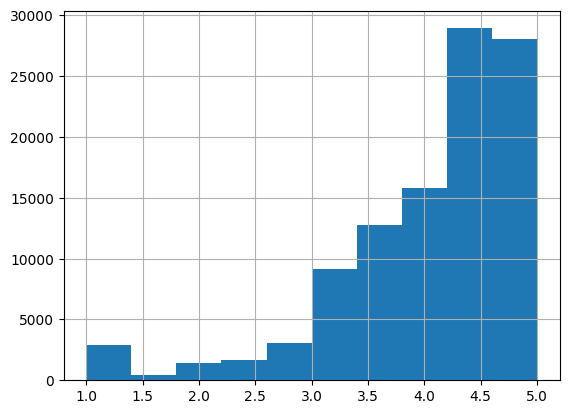

In [23]:
df.average_rating.hist()

<Axes: xlabel='main_category'>

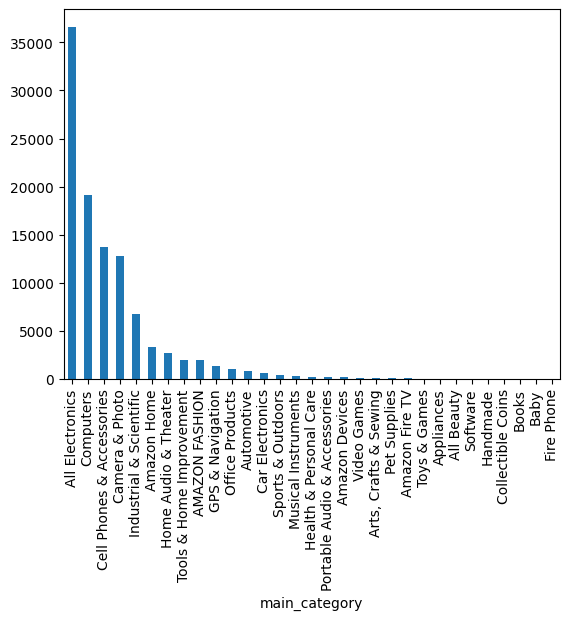

In [8]:
df['main_category'].value_counts().plot(kind='bar')

In [26]:
df.store.value_counts(dropna=False, normalize=True) *100

store
Generic           2.551133
Amazon Renewed    1.755887
HP                1.451059
Lenovo            0.851980
ASUS              0.631773
                    ...   
ACYWOBI           0.000962
Dolovo            0.000962
YOUCZON           0.000962
ACEJET            0.000962
Monrand           0.000962
Name: proportion, Length: 27670, dtype: float64

In [27]:
df.bought_together.value_counts(dropna=False, normalize=True) *100

bought_together
NaN    100.0
Name: proportion, dtype: float64

In [28]:
df.author.value_counts(dropna=False, normalize=True) *100

author
NaN    100.0
Name: proportion, dtype: float64

In [29]:
df.subtitle.value_counts(dropna=False, normalize=True) *100

subtitle
NaN    100.0
Name: proportion, dtype: float64

In [24]:
df.head(5)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Amazon Home,"Outer Space Planets Stickers(50Pcs),Planetary ...",4.5,50,[PROFESSIONAL STICKER SHOP.There are 50 differ...,"[Features:, - Clear picture and exquisite prin...",3.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Watch Before Buying! Huge Waterpro...,Affoto,"[Electronics, Computers & Accessories, Laptop ...","{'Brand': 'Affoto', 'Color': 'Outer Space', 'S...",B0BPLX8B2K,NaN,NaN,NaN
1,Computers,"Gateway 15.6"" FHD Ultra Slim Budget Notebook, ...",4.1,15,"[【Processor】4 Core, 4 Threads, 4MB Cache, up t...","[Processor:, Intel® Pentium® Silver N5030 Proc...",189.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Watch before you order ', 'url': '...",Gateway,"[Electronics, Computers & Accessories, Compute...",{'Standing screen display size': '15.6 Inches'...,B0BYBG1PPD,NaN,NaN,NaN
2,Cell Phones & Accessories,May Chen Compatible with MacBook Pro 16 inch C...,4.5,649,[【 COMPATIBLE WITH 】 Designed to Fits Perfectl...,[May Chen High Quality Plastic Hard Shell Case...,26.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'MOSISO Plastic Hard Shell Compati...,May Chen,"[Electronics, Computers & Accessories, Laptop ...","{'Standing screen display size': '16 Inches', ...",B0822SL7JX,NaN,NaN,NaN
3,All Electronics,"LENTION USB C Docking Station, 10 Gbps USB C&U...",4.4,16,[10-in-1 Docking Station - CB-D65 laptop docki...,[],89.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'LENTION D65 Upgrade Docking Statio...,LENTION,"[Electronics, Computers & Accessories, Laptop ...",{'Package Dimensions': '9.17 x 4.33 x 1.54 inc...,B0BKS1K986,NaN,NaN,NaN
4,All Electronics,1X (No Bluetooth) Eaglewireless Replacement To...,3.0,4,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Eaglewireless,[],{'Package Dimensions': '5.2 x 2.13 x 0.91 inch...,B09MY246CC,NaN,NaN,NaN


### Filter out items that have at least 100 ratings

In [9]:
df_ratings_100 = df[df['rating_number'] > 100]

## Explore distribution of ratings

<Axes: ylabel='Frequency'>

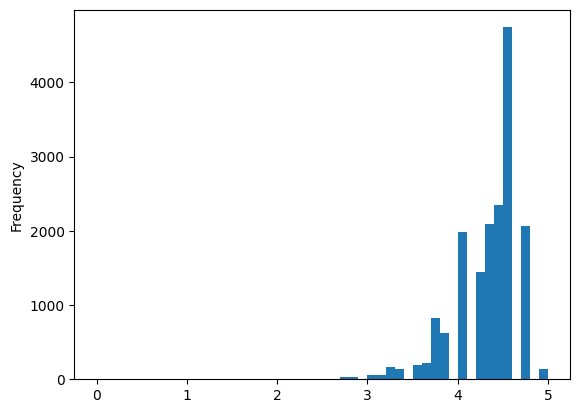

In [10]:
df_ratings_100['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

In [32]:
df_ratings_100.columns

Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
      dtype='object')

In [33]:
## Examine correlations between ratings and price. Plot correlation plot.

df_ratings_100[['average_rating', 'price']].corr()

,average_rating,price
average_rating,1.000000,-0.006369
price,-0.006369,1.000000


In [38]:
df_ratings_100.shape

(17162, 16)

There is not any linear relationship between average ratings and price, though let's check scatter plots.

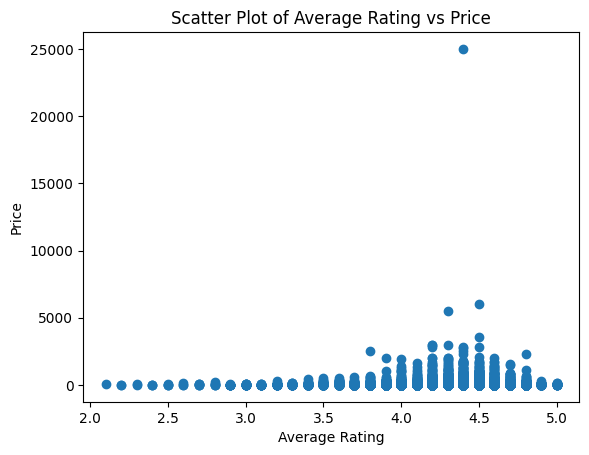

In [ ]:
plt.scatter(df_ratings_100['average_rating'], df_ratings_100['price'])
plt.xlabel('Average Rating')
plt.ylabel('Price')
plt.title('Scatter Plot of Average Rating vs Price')
plt.show()

#### Sample 1000 items

In [11]:
df_sample_1000 = df_ratings_100.sample(n=1000, random_state=20)

<Axes: ylabel='Frequency'>

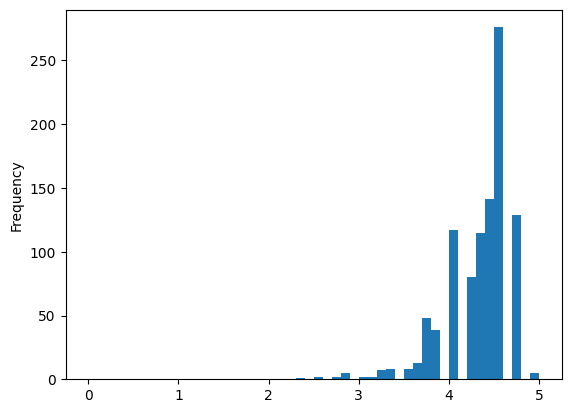

In [12]:
df_sample_1000['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

<Axes: ylabel='Frequency'>

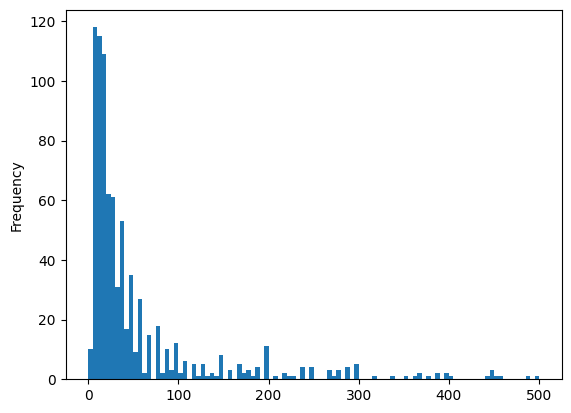

In [13]:
df_sample_1000['price'].plot(kind='hist', bins=100, range=(0, 500))

In [14]:
df_ratings_100.to_json("../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", orient='records', lines=True)

In [15]:
df_sample_1000.to_json("../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", orient='records', lines=True)

## Extract ratings that match sampled data.

In [16]:
df_ratings_100 = pd.read_json("../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", lines=True)
df_sample_1000 = pd.read_json("../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", lines=True)

In [17]:
with open("../data/Electronics.jsonl", 'r') as fp:
    with open("../data/Electornics_2022_2023_with_category_ratings_100.jsonl", 'a') as fp_out:
        id_list = df_ratings_100['parent_asin'].values
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")

Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines
Processed 1800000 lines
Processed 1900000 lines
Processed 2000000 lines
Processed 2100000 lines
Processed 2200000 lines
Processed 2300000 lines
Processed 2400000 lines
Processed 2500000 lines
Processed 2600000 lines
Processed 2700000 lines
Processed 2800000 lines
Processed 2900000 lines
Processed 3000000 lines
Processed 3100000 lines
Processed 3200000 lines
Processed 3300000 lines
Processed 3400000 lines
Processed 3500000 lines
Processed 3600000 lines
Processed 3700000 lines
Processed 3800000 lines
Processed 3900000 lines
Processed 4000000 lines
Processed 4100000 lines
Processed 4200000 lines
P

In [18]:
with open("../data/Electornics_2022_2023_with_category_ratings_100.jsonl", 'r') as fp:
    with open("../data/Electornics_2022_2023_with_category_ratings_100_sample_1000.jsonl", 'a') as fp_out:
        id_list = df_sample_1000['parent_asin'].values
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")

Processed 100000 lines
Processed 200000 lines
Processed 300000 lines
Processed 400000 lines
Processed 500000 lines
Processed 600000 lines
Processed 700000 lines
Processed 800000 lines
Processed 900000 lines
Processed 1000000 lines
Processed 1100000 lines
Processed 1200000 lines
Processed 1300000 lines
Processed 1400000 lines
Processed 1500000 lines
Processed 1600000 lines
Processed 1700000 lines
